In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## HW 4 Problem 2:

Consider a looking through a spherical cloud, with a radius of $5 \times 10^{10} \, \mathrm{cm}$. It contains absorbers that you can treat as small spheres with radii of $10^{−5} \, \mathrm{cm}$. The absorbers are uniformly distributed with a number density $n = 0.1 \, \mathrm{cm}^{-3}$.

1. What is the total number of absorbing particles in the cloud?
1. What is the average distance between absorbing particles?
1. What is the mean free path in the cloud?
1. What is the optical depth through the center of the cloud?
1. What fraction of the radiation that passes through the center of the cloud would be absorbed?

Start with 2:

In [2]:
box_side = cbrt(1/0.1) # cm
box_side

2.154434690031884

Now 3:

In [3]:
radius = 1e-5 # cm
cross_section = pi*radius**2
cross_section

3.1415926535897934e-10

In [6]:
face_area = box_side**2
N_boxes_to_absorption = face_area / cross_section
length_to_absorption = N_boxes_to_absorption*box_side
print('mean free path is {:g} cm'.format(length_to_absorption))

mean free path is 3.1831e+10 cm


Now 4:

In [9]:
cloud_radius = 5e10 # cm
optical_depth = 2*cloud_radius / length_to_absorption
optical_depth

3.141592653589793

Now 5:

In [11]:
absorption_fraction = 1 - exp(-optical_depth)
absorption_fraction

0.9567860817362277

In [12]:
-expm1(-optical_depth)

0.9567860817362277

## Degenerate Equation of State

Definition of pressure:
$$
P = \frac{\partial E}{\partial V}
$$

For degenerate pressure
$$
P \sim \rho^{5/3}
$$

One dimensional box, $0 \leq x \leq L$.  What are the energy levels?  First, the wavefunction:

Text(0.5, 0, '$x/L$')

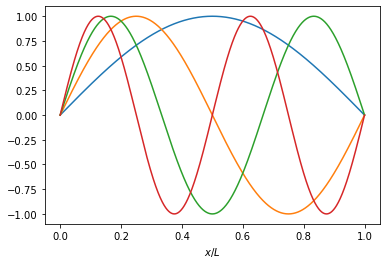

In [14]:
xs = linspace(0, 1, 1024)

plot(xs, sin(pi*xs))
plot(xs, sin(2*pi*xs))
plot(xs, sin(3*pi*xs))
plot(xs, sin(4*pi*xs))

xlabel(r'$x/L$')

Wavefunctions that go to zero at either end of the box are 
$$
\sin\left( \frac{n \pi x}{L} \right)
$$
for integer $n > 0$.

De Broglie wavelength:
$$
\lambda = \frac{h}{p} \implies p = \frac{h}{\lambda}
$$

So for our quantum states, we have 
$$
p = \frac{n h}{2 L} = \frac{n \pi \hbar}{L}
$$

And therefore each state has an energy:
$$
E_n = \frac{p^2}{2 m} = \frac{n^2 \pi^2 \hbar^2}{2 L^2 m}
$$

In 3D:
$$
E_n = \frac{\pi^2 \hbar^2 \left( n_x^2 + n_y^2 + n_z^2 \right)}{2 L^2 m}
$$

States fill from the origin $n_x = n_y = n_z = 0$; there are 
$$
N = \frac{4}{3} \pi n_\mathrm{max}^3
$$
states filled inside a sphere with $n < n_\mathrm{max}$.

$$
E_\mathrm{tot} = \int_0^{n_\mathrm{max}} \mathrm{d} n \, 4 \pi n^2 E_n \sim \frac{n_\mathrm{max}^5}{L^2 m}
$$

Convert $N$ to density and volume:
$$
N = \frac{\rho}{m} V
$$

And 
$$
n_\mathrm{max} \sim \frac{\rho^{1/3}}{m^{1/3}} V^{1/3}
$$

Also
$$
L \sim V^{1/3}
$$

So
$$
E_\mathrm{tot} \sim \frac{\rho^{5/3}}{m^{8/3}} V
$$

That means:
$$
P = \frac{\partial E}{\partial V} \sim \frac{\rho^{5/3}}{m^{8/3}}
$$